In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [47]:
df = sns.load_dataset('flights')
df['yearMonth']= pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace = True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


# Checking the stationarity of data

Check the stationarity of data by rolling statistics

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

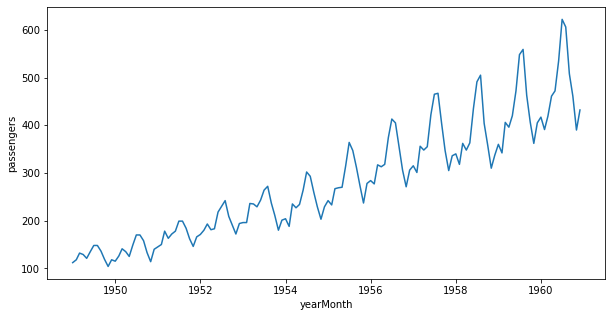

In [48]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)

In [92]:
df['rollMean']  = df.passengers.rolling(window=12).mean()
df['rollStd']  = df.passengers.rolling(window=12).std()

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

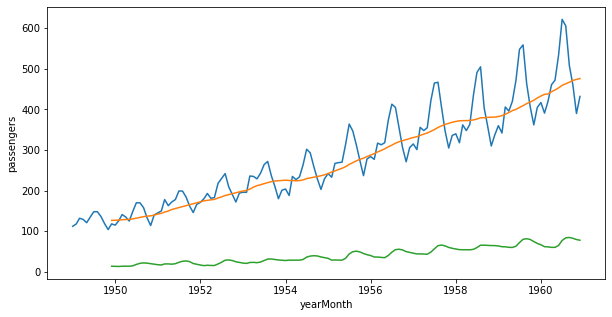

In [93]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)

Check stationarity of data using ADF Test

In [51]:
from statsmodels.tsa.stattools import adfuller

In [94]:
adfTest = adfuller(df['passengers'],autolag='AIC',)

In [53]:
adfTest

(0.8153688792060411,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [95]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [55]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


- As our Test Statistics is less than critical value therefore we can say our data is not stationary

If the data is not stationary then there are three ways to make the data stationary.
- Time Shift
- Log
- Square Root,Cube..

In [96]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

In [97]:
df.head()

,year,month,passengers,rollmean,rollstd,rollMean,rollStd
yearMonth,,,,,,,
1949-01-01,1949,Jan,112,NaN,NaN,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN,NaN,NaN


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


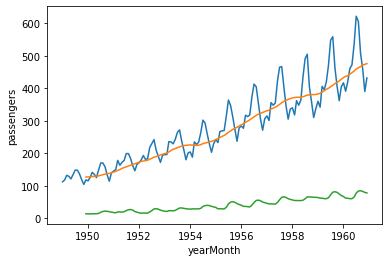

In [98]:
test_stationarity(df,'passengers')

In [99]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [100]:
# time shift

air_df['shift'] = air_df.passengers.shift()
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()

,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


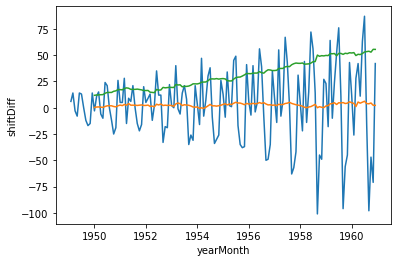

In [101]:
test_stationarity(air_df.dropna(),'shiftDiff')

Test Value is near to the criticality value. Mean value is constant but the variance and standard deviation showing trend

In [103]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


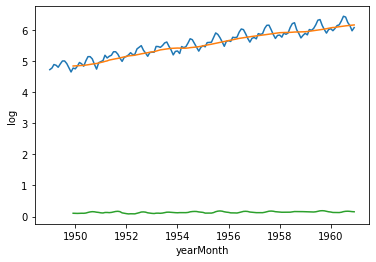

In [104]:
test_stationarity(log_df,'log')

The variance is preety constant in this case but the original data and mean is still showing the pattern. But still this graph can't conclude the very well. we say that p value is very high.

In [105]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


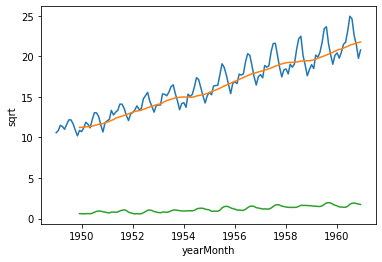

In [106]:
test_stationarity(sqrt_df,'sqrt')

In [107]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


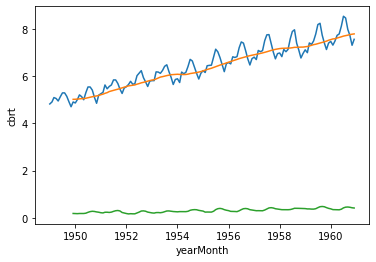

In [108]:
test_stationarity(cbrt_df,'cbrt')

In [109]:
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                  -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


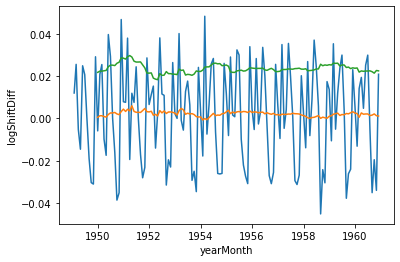

In [110]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

In [111]:
log_shift = df[['passengers']].copy(deep=True)
log_shift['log'] = np.log(log_shift['passengers'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()

,passengers,log,logShift,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,4.718499,0.052186
1949-03-01,132,4.882802,4.770685,0.112117
1949-04-01,129,4.859812,4.882802,-0.022990
1949-05-01,121,4.795791,4.859812,-0.064022


Test Statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


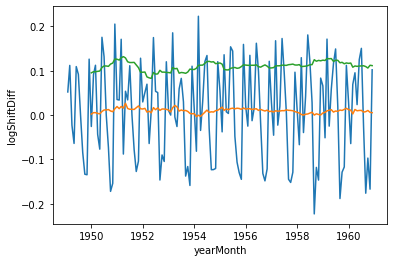

In [112]:
test_stationarity(log_shift.dropna(),'logShiftDiff')

In [113]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [114]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

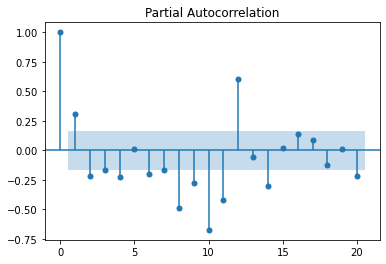

In [115]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

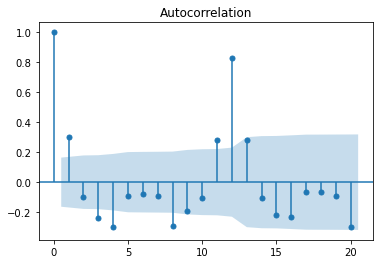

In [116]:
plot_acf(airP['firstDiff'].dropna(),lags=20);

In [117]:
train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [118]:
model = ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1960-08-01,606,-16.0,47.0,2.363205
1960-09-01,508,-98.0,45.0,2.363205
1960-10-01,461,-47.0,54.0,2.363205
1960-11-01,390,-71.0,28.0,2.363205
1960-12-01,432,42.0,27.0,2.363205


<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

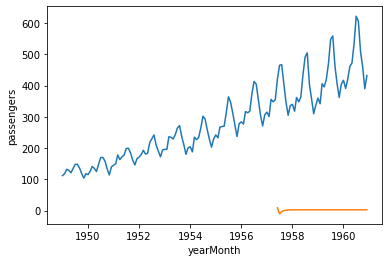

In [119]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

427.6007861910374

In [122]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

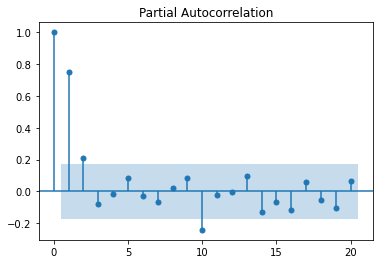

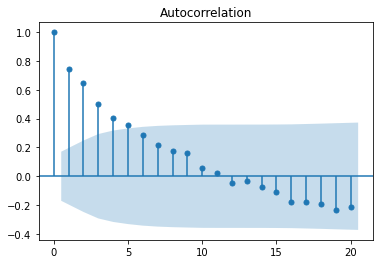

In [123]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);

In [124]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

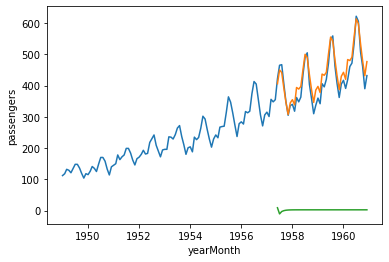

In [125]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
# model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [126]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.48107140406511

In [127]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [128]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])

1961-01-01    490.604130
1961-02-01    465.073696
1961-03-01    532.863926
1961-04-01    530.148280
1961-05-01    541.982117
1961-06-01    612.607882
1961-07-01    674.612111
1961-08-01    657.127301
1961-09-01    588.129896
1961-10-01    528.858187
1961-11-01    478.555176
1961-12-01    526.611334
1962-01-01    541.500575
1962-02-01    513.113883
1962-03-01    585.202541
1962-04-01    582.921546
1962-05-01    595.891122
1962-06-01    671.893787
1962-07-01    738.004716
1962-08-01    718.379295
1962-09-01    644.910082
1962-10-01    581.698495
1962-11-01    528.556351
1962-12-01    579.208879
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

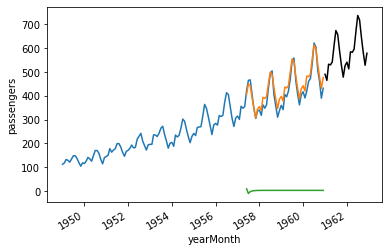

In [129]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [130]:
checkDf = df[['passengers']]
checkDf['diff1'] = checkDf.diff()
# checkDf['diffInv'] = checkDf['diff1'].diffinv()
checkDf.head()

,passengers,diff1
yearMonth,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
